# Exploring bias and variance using regularized linear and polynomial regression

This module explores bias and varience properties using Linear and Polynomial Regression. I was inspired to do this work after having taken [Andrew Ng's Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning). Most of the equations used herein come from his course notes. Most of them here are implemented in vectorized form.

Linear regression was explored in [this](https://github.com/lpandey/machine_learning/blob/main/linRegr.ipynb) module. Here I will include only the relevant regularized equations.

### Hypothesis
$\hat{y} = h_\theta(x) = \theta^{T}x$

### Cost function

$J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2 + \frac{\lambda}{2m} \sum\limits_{j=1}^{n} \theta_j^2$

### Gradient of the cost function
$\frac{\partial J(\theta)}{\partial \theta_j} = \left(\frac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j \right) + \frac{\lambda}{m}\theta_j$$J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2$

### Gradient Descent
At every step of the *gradient descent*, the parameters $\theta$ is updated as:

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)x_j^i$

**Note**, Here, $\lambda$ is the regularization parameter, $\alpha$ is the *learning rate*, and $j$ and $i$ are index elements of sample size $m$ and feature size $n$ (includes bias), respectively. Also note, the bias term $\theta_0$ is not regularized (applies to both cost function and its gradient).

### Exact Solution
The Normal Equation (closed-form solution) for regularized linear regression is:

$\theta = \left(X^TX+ \lambda I \right)^{-1}X^Ty$

*I* here is the identity matrix (n by n including the bias feature).

## Model Implementation

In [1]:
# import modules
%matplotlib inline
import scipy.io
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib plot settings
mpl.rc('axes', labelsize=14)
mpl.rc('axes', titlesize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#plt.rc('lines', linewidth=2.5)

In [2]:
# Utility Functions
def featureNormalize(X):
    '''
    Feature scaling such that each feature in the normalized X
    has mean of 0 and standard deviation of 1.  
    '''
    X_mean = np.mean(X, axis=0) # columns means
    X_std = np.std(X, axis=0) # columns std. deviations
    X_norm = (X - X_mean) / X_std # feature scaling
    return X_norm, X_mean, X_std


def closedFormSolution(X, y, reg=0):
    '''
    Normal equation (closed-form) solution of linear regression 
    '''
    m, n = X.shape
    I = np.eye((n))
    return np.linalg.inv(X.T @ X + reg * I) @ X.T @ y


def plotData(X, y, y_preds=False):
    plt.plot(X, y, 'bx')
    if isinstance(y_preds, np.ndarray): # predictions from model.predict
        plt.plot(X, y_preds, 'r-')
    plt.xlabel("Change in water level (x)")
    plt.ylabel("Water flowing out of the damn (y)")
    
    
def plotCostHistory(costs):
    plt.plot(costs, 'r-')
    plt.xlabel("iterations")
    plt.ylabel("cost")

In [3]:
class myLinearRegressionReg():
    '''
    My implementation of regularized Linear regression
    '''
    def __init__(self, lr=0.1, reg=0.1):
        self.lr = lr # learning rate
        self.reg = reg # regularization parameter
        
    def _costFunc(self, theta, y, h):
        '''
        Linear model cost function
        '''
        loss = 1/(2 * len(y)) * np.sum(np.power(h - y, 2))
        # regularization skips bias
        reg_loss = self.reg/(2*len(y)) * np.sum(np.power(theta[1:], 2))
        return  loss + reg_loss
                      
    def _gradient(self, theta, X, y, h):
        '''
        Linear model gradient (of the cost function)
        '''
        gradient = 1/len(y) * (X.T @ (h - y))
        # regularization skips bias
        #reg_gradient = self.reg / len(y) * theta[1:]
        # to avoid shape issues (for multiple features)
        # we'll set local theta for bias = 0
        _theta = copy.deepcopy(theta)
        _theta[0] = 0
        reg_gradient = self.reg / len(y) * _theta
        return gradient + reg_gradient
    
    def gradient_descent(self, X, y, tol=1e-5):
        '''
        Gradient Descent to train linear regression model.
        It is assumed that X already includes the bias term.
        '''
        # initialize
        self.theta = np.ones(shape=(X.shape[1], 1))
        self.costs = []
        #print(f"theta size: {self.theta.shape}")
        
        while True:
            h = X @ self.theta
            #print(f"h: {h.shape}")
            cost = self._costFunc(self.theta, y, h)
            #print(f"cost: {cost}")
            self.costs.append(cost)
            gradients = self._gradient(self.theta, X, y, h)
            #print(f"gradient: {gradients}, {gradients.shape}")
            new_Theta = self.theta - self.lr * gradients
            
            if np.sum(abs(new_Theta - self.theta)) < tol:
                break # stopping condition met
                
            self.theta = new_Theta # update Theta
            #print(f"theta: {self.theta}, {self.theta.shape}")

    
    def predict(self, X):
        '''
        Linear model predictions
        '''
        return X @ self.theta # predictions

## Loading dataset

The dataset used here is from [Andrew Ng's Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning). The dataset is already split into training, cross validation, and train sets.

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

--shapes--
X_train: (12, 1), y_train: (12, 1)
X_valid: (21, 1), y_valid: (21, 1)
X_test: (21, 1), y_test: (21, 1)
Xb_train: (12, 2)
Xb_valid: (21, 2)
Xb_test: (21, 2)


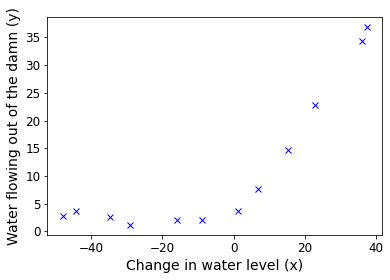

In [4]:
mat = scipy.io.loadmat('ex5data1.mat')
print(mat.keys())

X_train, y_train = mat["X"], mat["y"]
X_valid, y_valid = mat["Xval"], mat["yval"]
X_test, y_test = mat["Xtest"], mat["ytest"]

print("\n--shapes--")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# add bias
Xb_train = np.c_[np.ones(shape=(len(X_train), 1)), X_train]
Xb_valid = np.c_[np.ones(shape=(len(X_valid), 1)), X_valid]
Xb_test = np.c_[np.ones(shape=(len(X_test), 1)), X_test]
print(f"Xb_train: {Xb_train.shape}")
print(f"Xb_valid: {Xb_valid.shape}")
print(f"Xb_test: {Xb_test.shape}")

# plot training data
plotData(X_train, y_train)

## Linear regression fit

In [5]:
model = myLinearRegressionReg(lr=1e-3, reg=0)
# the dataset seems to be very sensitive to learning rate
# learning rate > 1e-3 made the cost explode
%time model.gradient_descent(Xb_train, y_train, tol=1e-5)
train_costs, train_theta = model.costs, model.theta
print(f"\ntheta (optimized):\n {train_theta}\n")
theta_true = closedFormSolution(Xb_train, y_train)
print(f"theta (closed-form soln.):\n {theta_true}")

CPU times: user 309 ms, sys: 17.2 ms, total: 326 ms
Wall time: 316 ms

theta (optimized):
 [[13.07765068]
 [ 0.36771774]]

theta (closed-form soln.):
 [[13.08790351]
 [ 0.36777923]]


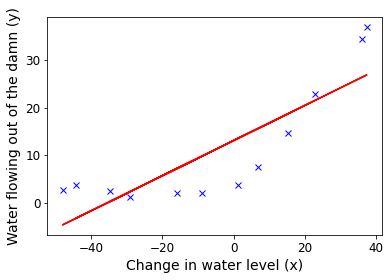

In [6]:
y_train_preds = model.predict(Xb_train)
plotData(X_train, y_train, y_preds=y_train_preds)

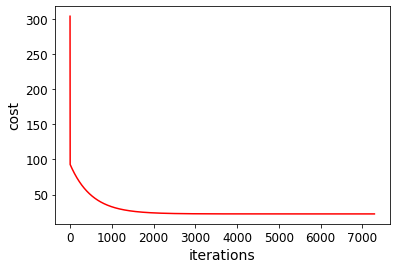

In [7]:
# training set costs
plotCostHistory(train_costs)

## Learning curves

The training error for a dataset is:

$J_{train}(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} \left(\hat{y_i} - y_i\right)^2$

**Note** for learning curves, the training set error is evaluated from subset of total training set samples (the size that was used to obtain the $\theta$, whereas the cross validation error is evalauated from all validation samples.

In [8]:
# function to get training and validation set errors for learning curve
def learningCurve(X, y, Xv, yv, lr=1e-3, reg=0):
    '''
    Generates train and cross-validation set errors to help plot
    learning curve'''
    m = len(y)
    
    #initializa
    error_train = []
    error_valid = []
    
    for i in range(1, m+1):
        Xt, yt = X[:i], y[:i] # only i of m samples
        model = myLinearRegressionReg(lr=lr, reg=reg)
        model.gradient_descent(Xt, yt, tol=1e-5)
        theta = model.theta  # from only m samples
        # training error only for i of m samples
        err_t = 1/(2*i) * np.sum(np.power(Xt @ theta - yt, 2))
        error_train.append(err_t)
        # validation error from all m samples
        err_v = 1/(2*m) * np.sum(np.power(Xv @ theta - yv, 2))
        error_valid.append(err_v)
    
    return error_train, error_valid

# call function to get errors for learning curve
error_train, error_valid = learningCurve(Xb_train, y_train,
                                         Xb_valid, y_valid)

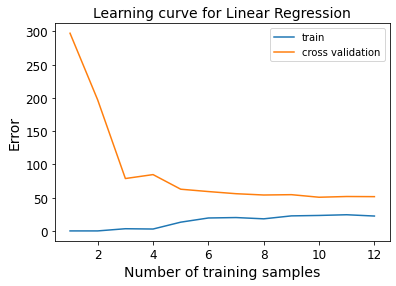

In [9]:
# plot learning curve
def plotLearningCurve(error_train, error_valid):
    plt.figure()
    ntrs = range(1,len(error_train)+1) # number of training samples
    plt.plot(ntrs, error_train, label="train")
    plt.plot(ntrs, error_valid, label="cross validation")
    plt.ylabel("Error")
    plt.xlabel("Number of training samples")
    plt.title("Learning curve for Linear Regression")
    #plt.axis([1,12, 0, 125])
    plt.legend();
    
plotLearningCurve(error_train, error_valid)

This above learning plot represents an **high bias (underfit)** problem where both $J(\theta)_{train}$ and $J(\theta)_{valid}$ are high and comparable - this was expected because the water flow appears to be non-linear with respect to the change in water level (based on the scatter plot of the training data above). This will be tackled with polynomial regression below. 

**High variance (overfit)** problem would represent low $J(\theta)_{train}$ and $J(\theta)_{valid} >> J(\theta)_{train}$.

# Polynomial Regression

The polynomial regression here has additional features that are simply higher orders of the original data:

$\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x$ <-- linear

$\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + ...$ <-- polynomial

However, with the assumptions $f_1 = x,  f_2 = x^2,  f_3 = x^3, ...$, the polynomial regression effectively turns into a linear model.

$\hat{y} = h_\theta(f) = \theta_0 + \theta_1 f + \theta_2 f_2 + \theta_3 f_3 + ...$

### Prepare polynomial data

In [10]:
# add features of higher order
maxOrder = 8
X_train_poly = np.power(X_train, range(1,maxOrder+1)) # 1-8th power
X_valid_poly = np.power(X_valid, range(1,maxOrder+1))
X_test_poly  = np.power(X_test,  range(1,maxOrder+1))

# feature normalize X_train_poly
X_train_poly, means, stds = featureNormalize(X_train_poly)

# use train set means & stds to feature normalize valid & test sets  
X_valid_poly = X_valid_poly - means # each col mean 0 now 
X_test_poly  = X_test_poly  - means
X_valid_poly = X_valid_poly / stds  # each col std 1 now
X_test_poly = X_test_poly / stds

# add bias column
Xb_train_poly = np.c_[np.ones(shape=(len(X_train_poly), 1)), X_train_poly]
Xb_valid_poly = np.c_[np.ones(shape=(len(X_valid_poly), 1)), X_valid_poly]
Xb_test_poly  = np.c_[np.ones(shape=(len(X_test_poly),  1)), X_test_poly]

print("--shapes--")
print(f"Xb_train_poly : {Xb_train_poly.shape}")
print(f"Xb_valid_poly : {Xb_valid_poly.shape}")
print(f"Xb_test_poly  : {Xb_test_poly.shape}")

--shapes--
Xb_train_poly : (12, 9)
Xb_valid_poly : (21, 9)
Xb_test_poly  : (21, 9)


### Train polynomial

In [11]:
model_poly = myLinearRegressionReg(lr=2.5e-4, reg=0)
%time model_poly.gradient_descent(Xb_train_poly, y_train, tol=1e-5)

CPU times: user 47.3 s, sys: 526 ms, total: 47.9 s
Wall time: 48.9 s



theta (optimized):
 [[11.21758933]
 [12.44576865]
 [11.1222019 ]
 [ 2.73530906]
 [-2.66779239]
 [-2.14324743]
 [-2.30877949]
 [-1.9654936 ]
 [-1.18517152]]

theta (closed-form soln.):
 [[ 11.21758933]
 [  9.13124818]
 [ 18.17727033]
 [ 28.9301793 ]
 [-27.23824133]
 [-74.47076142]
 [  6.77178106]
 [ 60.68644113]
 [ 20.63841717]]


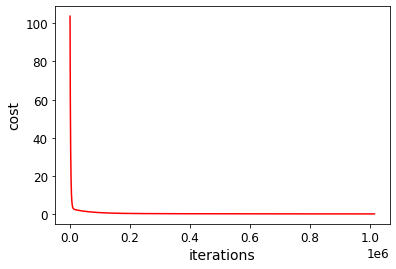

In [15]:
theta_poly, costs_poly = model_poly.theta, model_poly.costs
print(f"\ntheta (optimized):\n {theta_poly}\n")
theta_poly_true = closedFormSolution(Xb_train_poly, y_train)
print(f"theta (closed-form soln.):\n {theta_poly_true}")
plotCostHistory(costs_poly)

### Learning curve (polynomial)

In [16]:
# get train and cross valid errors for learning curve
err_train_poly, err_valid_poly = learningCurve(
    Xb_train_poly, y_train, Xb_valid_poly, y_valid, lr=2.5e-4, reg=0)

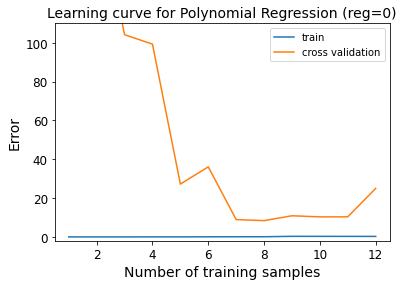

In [17]:
# plot learning curve (poly)
plotLearningCurve(err_train_poly, err_valid_poly)
plt.title(f"Learning curve for Polynomial Regression (reg={0})")
plt.axis([0.5, 12.5, -2, 110]);

The above learning curve indicates this model represents an **high variance (overfit)** problem as training error is low and there is large gap between cross validation and training erros (cv error >> training error).

### Plot Polyfit

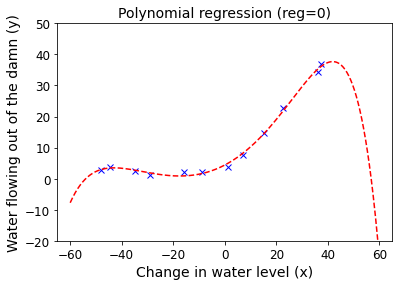

In [18]:
x = np.linspace(-60, 60, 500).reshape(-1,1)

# feature normalize x
x_poly = np.power(x, range(1,maxOrder+1))
x_poly = x_poly - means
x_poly = x_poly / stds

# add bias
xb_poly = np.c_[np.ones(shape=(len(x_poly), 1)), x_poly]

y = xb_poly @ theta_poly
# plot
plotData(X_train, y_train, y_preds=0)
plt.plot(x, y, 'r--')
plt.title(f"Polynomial regression (reg={0})")
plt.axis([-65, 65, -20, 50]);

The polyfit curve above confirms the *high variance (overfit)* problem assessment from the learning curve - the polyfit fits the data points well however it rapidly falls off outside the range of the datapoints (on both sides).

The overfit was expeted because of the use of high order polynomials in the polyfit dataset. One way to tackle the overfit problem is by using appropriate regularization parameter. The section below tries to do that by comparing training error against cross validation error for a range of regularization parameters.

### Regularization parameter search using training and cross validation errors

In [19]:
# define function to get training and cross validation errors
# with varying regularization parameter
def helpSelectReg(Xt, yt, Xv, yv, lr=2.5e-4, regs=[0]):
    '''regs is a list of regulization parameter values'''
    errs_t, errs_v = [], []
    m_t, m_v = len(yt), len(yv)
    for reg in regs:
        model_reg = myLinearRegressionReg(lr=lr, reg=reg)
        model_reg.gradient_descent(Xt, yt, tol=1e-5)
        theta_reg, costs_reg = model_reg.theta, model_reg.costs
        # use optimized theta to obtain errors. NOTE the errors here
        # do not include regularization terms explicitely as is
        # in the gradient descent optimization because the it is already
        # used there to optimize theta
        err_t = 1/(2*m_t) * np.sum(np.power(Xt @ theta_reg - yt, 2))
        errs_t.append(err_t)
        err_v = 1/(2*m_v) * np.sum(np.power(Xv @ theta_reg - yv, 2))
        errs_v.append(err_v)
        
    return errs_t, errs_v

**Note**: The training, cross validation, and test set errors do not include the regularization terms directly (or explicitly) in the error evaluation. This is to avoid double contributions because its effect is already implemented on optimizing the theta parameters during gradient descent.

In [20]:
regs = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
errs_t, errs_v = helpSelectReg(Xb_train_poly, y_train, 
                        Xb_valid_poly, y_valid, lr=2.5e-4, regs=regs)

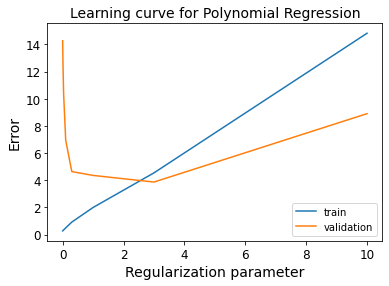

In [21]:
# plot learning curve for selecting regularization paramter
plt.figure()
plt.plot(regs, errs_t, label="train")
plt.plot(regs, errs_v, label="validation")
plt.ylabel('Error')
plt.xlabel("Regularization parameter")
plt.title("Learning curve for Polynomial Regression")
plt.legend();

The above learning curve suggests regularization parameter of about 2.5 yields training and cross validation errors about equal to one another. This value will be used to train model and evaluate error on the test set.

## Evaluating test set error

In [22]:
# train model based on parameters searched above
model = myLinearRegressionReg(lr=2.5e-4, reg=2.5)
model.gradient_descent(Xb_train_poly, y_train, tol=1e-5)
theta, costs = model.theta, model.costs
m_test = len(y_test)
err_test = 1/(2*m_test) * np.sum(np.power(
    Xb_test_poly @ theta - y_test, 2))
print(f"test set error: {err_test:.4f}")

test set error: 3.1003
